In [61]:
#importing Keras, Library for deep learning 
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#preprocessing data
trainData = pd.read_csv('/home/deepak/Desktop/deepWork/machineLearning/dataset/mnistData/mnist_train.csv')
testData = pd.read_csv('/home/deepak/Desktop/deepWork/machineLearning/dataset/mnistData/mnist_test.csv')

In [29]:
print(trainData.shape, testData.shape)

(60000, 785) (10000, 785)


In [44]:

data = trainData.append(testData)
data.shape

(70000, 785)

In [79]:
# Reshapping the data because data is in rows and we need matrix for computation
# Convert into 28*28*1 using reshape fun (1 because it contains only blackandWhite)
data.iloc[1, 1:].values.reshape(28, 28).astype('uint8')

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [36]:
#Storing Pixel array in form length width and channel in df_x
df_x = data.iloc[:,1:].values.reshape(len(data), 28, 28, 1)
# storing labels in y
y = data.iloc[:, 0].values

In [39]:
# now y conatins 0...9 which may have relationship among them
# like our model may refer 2 = 2*1
# so we will convert it into categorical vectors
# like 0 will be [1 0 0 ...0], 1 = [0 1 0 .... 0]
#Converting labels to categorical features

df_y = keras.utils.to_categorical(y,num_classes=10)

In [40]:
df_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
df_x  =  np.array(df_x)
df_y  =  np.array(df_y)

In [43]:
df_x.shape

(70000, 28, 28, 1)

In [46]:
# test train split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)
# done with preprocessing

In [49]:
#CNN model
model = Sequential()
# 32 filter 3*3 size
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
# reduce number of parameters by getting imporatant params
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # converts all matrix to single vector
model.add(Dense(100))    #100 NN nodes 
model.add(Dropout(0.5))
model.add(Dense(10))     #output on NN will have 10 node as our output will be categorical nodes
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy']) # chose loss fun

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [55]:
#fitting it with just 100 images for testing 
model.fit(x_train, y_train, epochs=30, validation_data = (x_test, y_test) )

Train on 56000 samples, validate on 14000 samples
Epoch 1/30
56000/56000 [==============================] - 44s 781us/step - loss: 0.2824 - acc: 0.9721 - val_loss: 0.2220 - val_acc: 0.9769
Epoch 2/30
56000/56000 [==============================] - 43s 771us/step - loss: 0.2180 - acc: 0.9723 - val_loss: 0.1564 - val_acc: 0.9731
Epoch 3/30
56000/56000 [==============================] - 43s 775us/step - loss: 0.1364 - acc: 0.9689 - val_loss: 0.1062 - val_acc: 0.9737
Epoch 4/30
56000/56000 [==============================] - 45s 810us/step - loss: 0.0983 - acc: 0.9746 - val_loss: 0.0856 - val_acc: 0.9788
Epoch 5/30
56000/56000 [==============================] - 42s 742us/step - loss: 0.0836 - acc: 0.9775 - val_loss: 0.0910 - val_acc: 0.9757
Epoch 6/30
56000/56000 [==============================] - 40s 710us/step - loss: 0.0768 - acc: 0.9789 - val_loss: 0.0827 - val_acc: 0.9789
Epoch 7/30
56000/56000 [==============================] - 38s 685us/step - loss: 0.0711 - acc: 0.9806 - val_loss: 0.

In [56]:
model.evaluate(x_test,y_test)

14000/14000 [==============================] - 3s 213us/step


[0.11383333774054245, 0.9805714285714285]

In [101]:
img = trainData.iloc[:, 1:]
img.shape

(60000, 784)

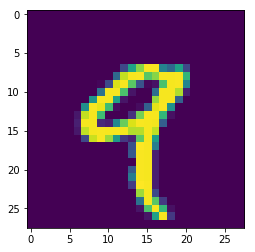

In [206]:
index = 4
testImg = trainData.iloc[index:(index+1), 1:]
img = testImg.values.reshape(1, 28, 28)
plt.imshow(img[0])
plt.show()
img = img.reshape(1, 28, 28, 1)

In [207]:
predicted = model.predict(img, verbose=0)

In [208]:
np.argmax(predicted, axis=None, out=None)

9